In [1]:
from Calculator import *
from Potentials import *
from Helpers import *
from Plotter import *
# %matplotlib notebook

## Plot ideal trap potential resulting for given parameters only

C:\Users\Karthik\anaconda3\envs\Py39VEnv\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


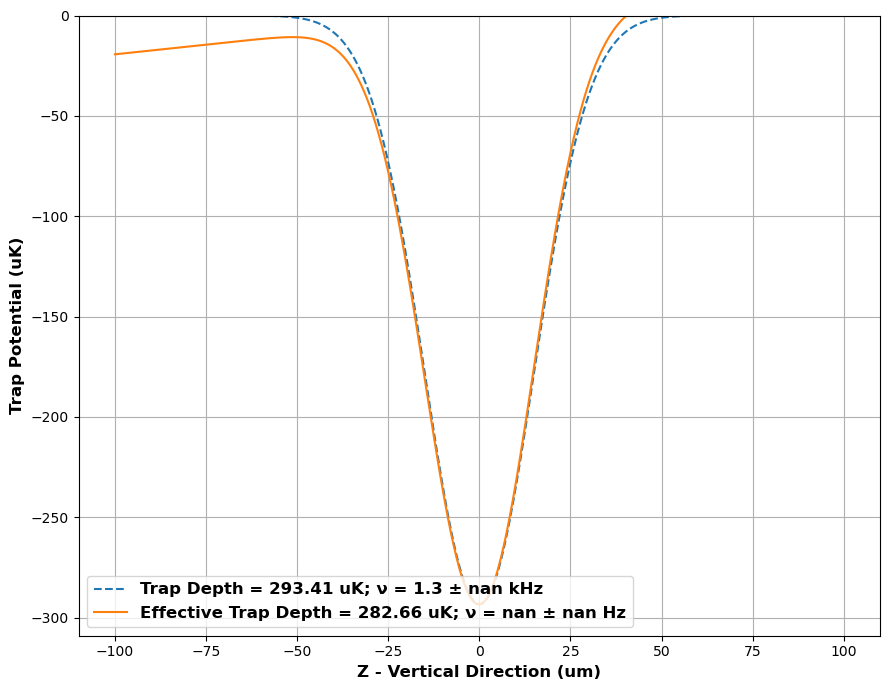

In [2]:
Power = 40*u.W
Wavelength = 1.064*u.um
w_x, w_z = 30*u.um, 30*u.um # Beam Waists in the x and y directions

#Power = 11*u.W
#w_x, w_z = 67*u.um, 67*u.um # Beam Waists in the x and y directions

options = {
    'axis': 2, # axis referenced to the beam along which you want the dipole trap potential
    'extent': 1e2, # range of spatial coordinates in one direction to calculate trap potential over
    'crossed': False,
    'delta': 70, # angle between arms in degrees
    'modulation': True,
    'aspect_ratio': 4, # required aspect ratio of modulated arm
    'gravity': True,
    'tilt_gravity': False,
    'theta': 0.75, # gravity tilt angle in degrees
    'tilt_axis': [1, 0, 0], # lab space coordinates are rotated about x-axis in reference frame of beam
    'astigmatism': False,
    'disp_foci': 2.5*u.mm, #0.9 * z_R(w_0 = np.asarray([30]), lamb = 1.064)[0]*u.um, # difference in position of the foci along the propagation direction (Astigmatism)
    'extract_trap_frequencies': False
}

ComputedPotentials = [] 
Params = []  

Positions, IdealTrappingPotential, TrappingPotential, TrapDepthsInKelvin, CalculatedTrapFrequencies, ExtractedTrapFrequencies = computeTrapPotential(w_x, w_z, Power, options)
ComputedPotentials.append(IdealTrappingPotential)
ComputedPotentials.append(TrappingPotential)
Params.append([TrapDepthsInKelvin, CalculatedTrapFrequencies, ExtractedTrapFrequencies])

cpots = np.asarray(ComputedPotentials)
plotPotential(Positions, cpots, options, Params)

## Plot harmonic fit for trap potential resulting for given parameters only

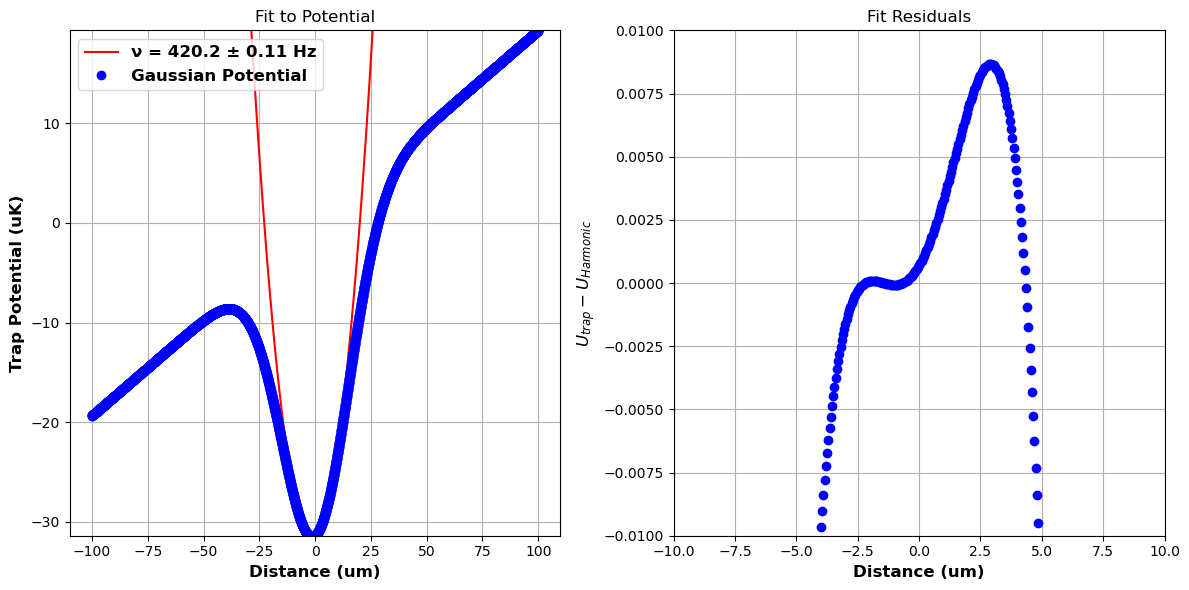

In [3]:
v, dv, popt, pcov = extractTrapFrequency(Positions, TrappingPotential, options['axis'])
plotHarmonicFit(Positions, TrappingPotential, TrapDepthsInKelvin, options['axis'], popt, pcov)

## Plot trap potential resulting for given parameters (with one parameter being a list of values and the potential being computed for each of these values) only

C:\Users\Karthik\anaconda3\envs\Py39VEnv\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


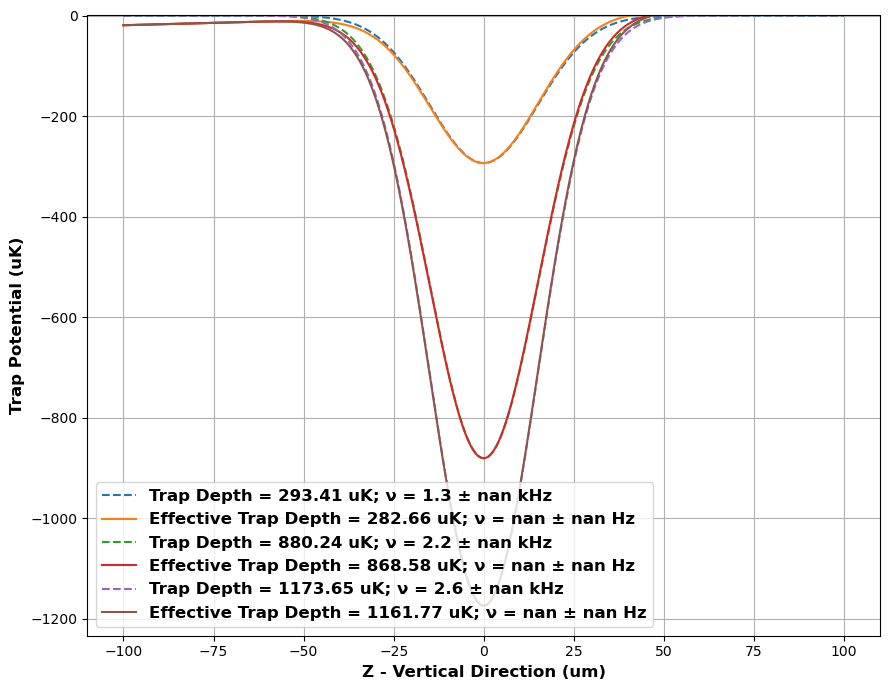

In [4]:
Potentials = [] 
Params = []  
Power = [10, 30, 40]*u.W # Single Beam Power
for p in Power: 
    Positions, IdealTrappingPotential, TrappingPotential, TrapDepthsInKelvin, CalculatedTrapFrequencies, ExtractedTrapFrequencies = computeTrapPotential(w_x, w_z, p, options)
    Potentials.append(IdealTrappingPotential)
    Potentials.append(TrappingPotential)
    Params.append([TrapDepthsInKelvin, CalculatedTrapFrequencies, ExtractedTrapFrequencies])

cpots = np.asarray(Potentials)
plotPotential(Positions, cpots, options, Params)

## Plot transverse intensity profile and trap potential resulting for given parameters only

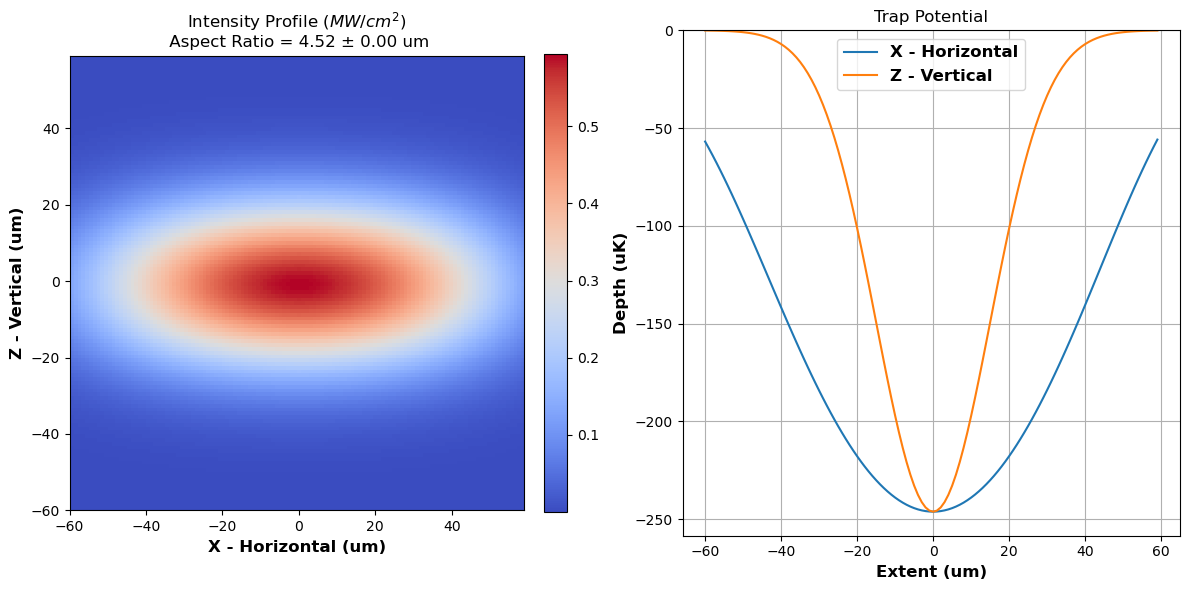

In [5]:
Power = 40*u.W
Wavelength = 1.064*u.um
w_x, w_z = 30*u.um, 30*u.um # Beam Waists in the x and y directions

options = {
    'axis': 2, # axis referenced to the beam along which you want the dipole trap potential
    'extent': 60, # range of spatial coordinates in one direction to calculate trap potential over
    'crossed': False,
    'delta': 70, # angle between arms in degrees
    'modulation': True,
    'modulation_function': 'arccos',
    'modulation_amplitude': 2.16,
    'aspect_ratio': 4, # required aspect ratio of modulated arm
    'gravity': True,
    'tilt_gravity': False,
    'theta': 0.75, # gravity tilt angle in degrees
    'tilt_axis': [1, 0, 0], # lab space coordinates are rotated about x-axis in reference frame of beam
    'astigmatism': False,
    'disp_foci': 2.5*u.mm, #0.9 * z_R(w_0 = np.asarray([30]), lamb = 1.064)[0]*u.um, # difference in position of the foci along the propagation direction (Astigmatism)
    'extract_trap_frequencies': False
}

positions, waists, I, U, p = computeIntensityProfileAndPotentials(Power, [w_x, w_z], Wavelength, options)
plotIntensityProfileAndPotentials(positions, waists, I, U)

## Plot gaussian fit for trap potential resulting from modulation for given parameters only

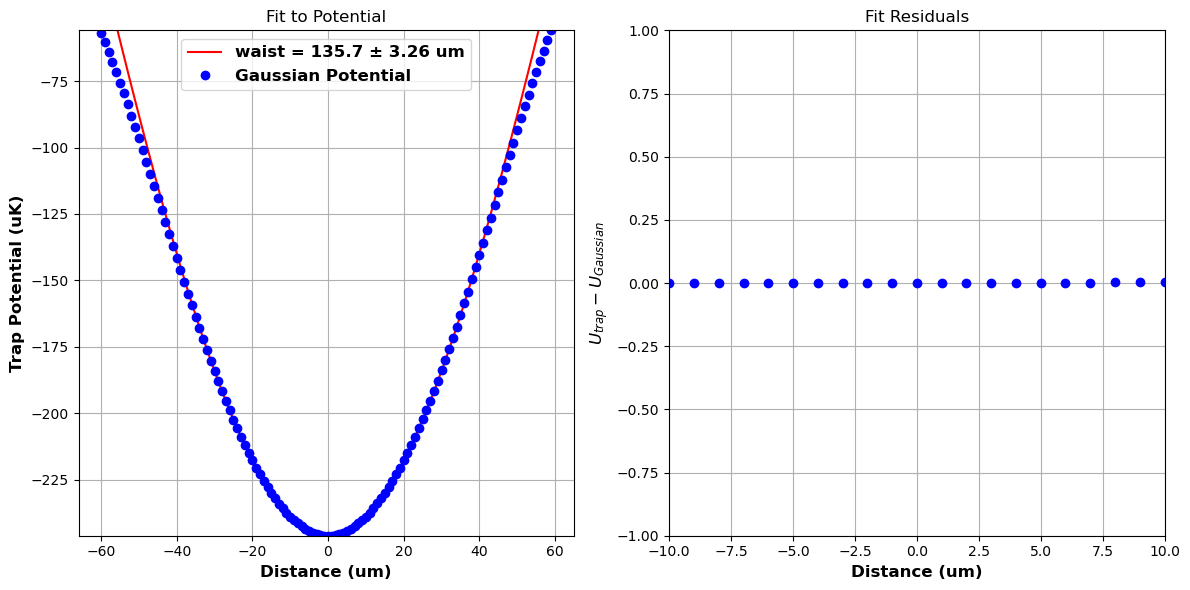

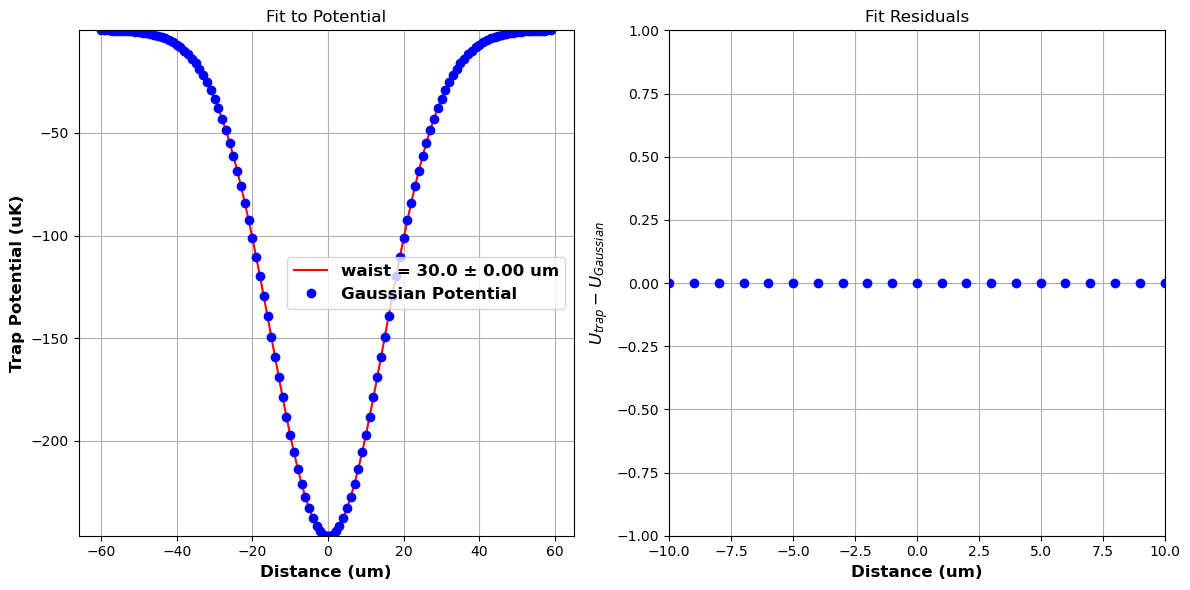

In [6]:
x_Positions = positions[0].value
z_Positions = positions[1].value
x_Potential = U[:, np.where(z_Positions==0)[0][0]].value
z_Potential = U[np.where(x_Positions==0)[0][0], :].value
poptx, pcovx = p[0], p[1]
poptz, pcovz = p[2], p[3]
plotGaussianFit(x_Positions, x_Potential, poptx, pcovx)
plotGaussianFit(z_Positions, z_Potential, poptz, pcovz)

## Calculate relevant parameters for evaporative cooling

In [7]:
Power = 40*u.W
Wavelength = 1.064*u.um
w_x, w_z = 30*u.um, 30*u.um # Beam Waists in the x and y directions

AtomNumber = 1.00 * 1e7
BField = 2.5 * u.G

modulation_depth = 0.0
Temperature = convert_modulation_depth_to_temperature(modulation_depth)[0] * u.uK
n = particleDensity(w_x, w_z, Power, N = AtomNumber, T = Temperature).decompose().to(u.cm**(-3))
Gamma_elastic = calculateElasticCollisionRate(w_x, w_z, Power, N = AtomNumber, T = Temperature, B = BField)
PSD = calculatePSD(w_x, w_z, Power, N = AtomNumber, T = Temperature).decompose()

print('Particle Density = %.2E ' % (n.value) + str(n.unit))
print('Elastic Collision Rate = %.2f ' % (Gamma_elastic.value) + str(Gamma_elastic.unit))
print('PSD = %.2E ' % (PSD.value))

v_x = calculateTrapFrequency(w_x, w_z, Power, dir = 'x')
v_y = calculateTrapFrequency(w_x, w_z, Power, dir = 'y')
v_z = calculateTrapFrequency(w_x, w_z, Power, dir = 'z')

print('v_x = %.2f ' %(v_x.value) + str(v_x.unit))
print('v_y = %.2f ' %(v_y.value) + str(v_y.unit))
print('v_z = %.2f ' %(v_z.value) + str(v_z.unit))

print('a_s = %.2f ' %(scatteringLength(BField)[0] / ac.a0))

Particle Density = 4.63E+13 1 / cm3
Elastic Collision Rate = 2813.75 1 / s
PSD = 9.00E-05 
v_x = 2588.17 Hz
v_y = 20.66 Hz
v_z = 2588.17 Hz
a_s = 111.31 


## Plot alphas

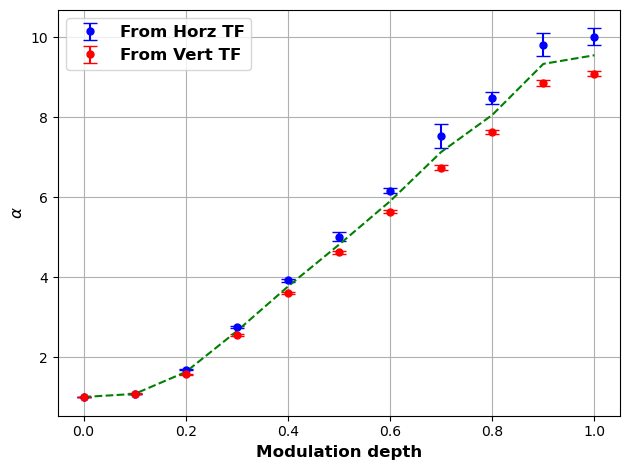

In [3]:
plotAlphas()

## Plot Temperatures

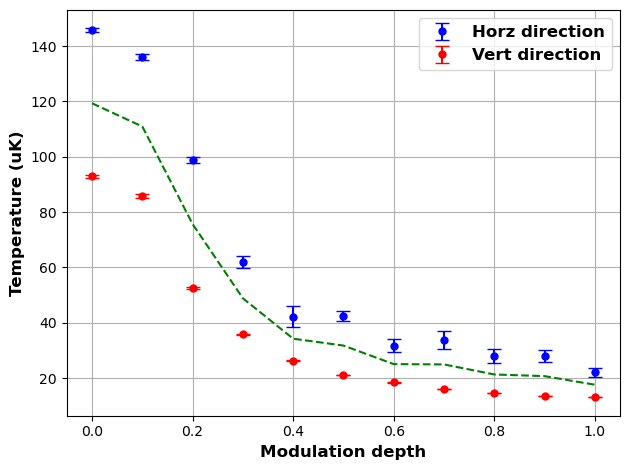

In [4]:
plotTemperatures(w_x, w_z, plot_against_mod_depth = True)

##  Calculate and Plot calculated trap frequencies

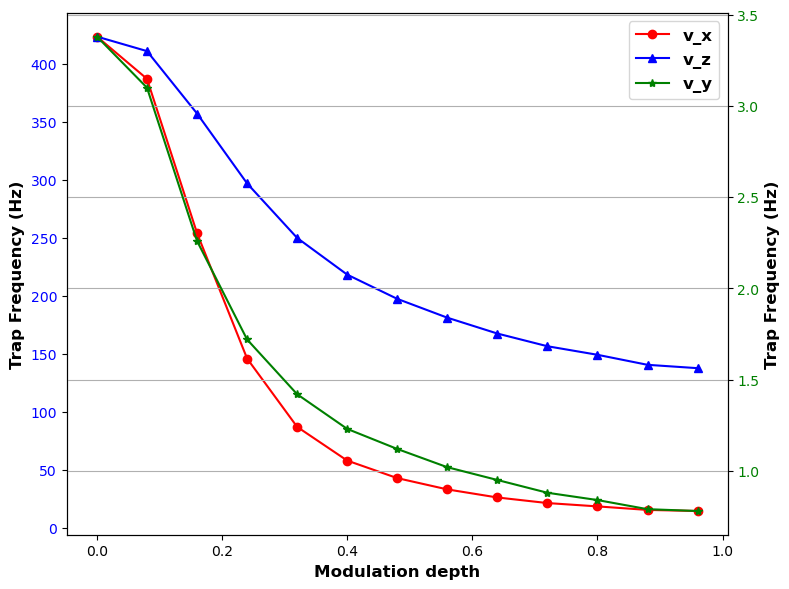

In [5]:
AtomNumber = 1.00 * 1e7
BField = 1.4 * u.G
Wavelength = 1.064*u.um
w_x, w_z = 30*u.um, 30*u.um # Beam Waists in the x and y directions
modulation_depth = np.arange(0, 1.0, 0.08)

w_xs = w_x * convert_modulation_depth_to_alpha(modulation_depth)[0]
new_aspect_ratio  = w_xs / w_z

v_x = np.zeros(len(modulation_depth))
v_y = np.zeros(len(modulation_depth))
v_z = np.zeros(len(modulation_depth))

for i in range(len(modulation_depth)):
    v_x[i] = calculateTrapFrequency(w_xs[i], w_z, Power, dir = 'x').value
    v_y[i] = calculateTrapFrequency(w_xs[i], w_z, Power, dir = 'y').value
    v_z[i] = calculateTrapFrequency(w_xs[i], w_z, Power, dir = 'z').value

plotTrapFrequencies(v_x, v_y, v_z, modulation_depth, new_aspect_ratio, plot_against_mod_depth = True)

## Plot measured trap frequencies

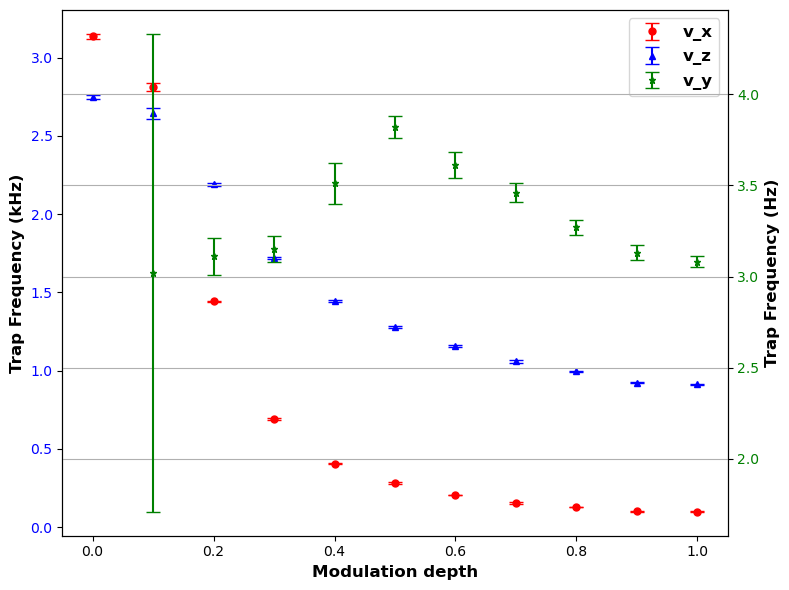

In [6]:
modulation_depth_radial = [0, 0.5, 0.3, 0.7, 0.9, 0.8, 1.0, 0.6, 0.4, 0.2, 0.1]
fx = [3.135, 0.28, 0.690, 0.152, 0.102, 0.127, 0.099, 0.205, 0.404, 1.441, 2.813]
dfx = [0.016, 0.006, 0.005, 0.006, 0.003, 0.002, 0.002,0.002, 0.003, 0.006, 0.024]
fz = [2.746, 1.278, 1.719, 1.058, 0.923, 0.994, 0.911, 1.157, 1.446, 2.191, 2.643]
dfz = [0.014, 0.007, 0.009, 0.007, 0.005, 0.004, 0.004, 0.005, 0.007, 0.009, 0.033]

modulation_depth_axial = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
fy = [3.08, 3.13, 3.27, 3.46, 3.61, 3.82, 3.51, 3.15, 3.11, 3.02]
dfy = [0.03, 0.04, 0.04, 0.05, 0.07, 0.06, 0.11, 0.07, 0.1, 1.31]

plotMeasuredTrapFrequencies(fx, dfx, fy, dfy, fz, dfz,  modulation_depth_radial, modulation_depth_axial, w_x, w_z, plot_against_mod_depth = True)

## Plot ratio of measured to calculated trap frequencies

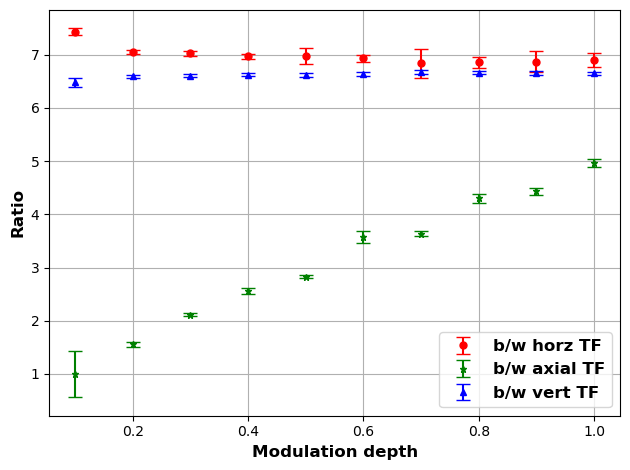

In [7]:
modulation_depth = [0.5, 0.3, 0.7, 0.9, 0.8, 1.0, 0.6, 0.4, 0.2, 0.1]
w_xs = w_x * convert_modulation_depth_to_alpha(modulation_depth)[0]

v_x = np.zeros(len(modulation_depth))
v_y = np.zeros(len(modulation_depth))
v_z = np.zeros(len(modulation_depth))

for i in range(len(modulation_depth)):
    v_x[i] = calculateTrapFrequency(w_xs[i], w_z, Power, dir = 'x').value / 1e3
    v_y[i] = calculateTrapFrequency(w_xs[i], w_z, Power, dir = 'y').value
    v_z[i] = calculateTrapFrequency(w_xs[i], w_z, Power, dir = 'z').value / 1e3

fx = [0.28, 0.690, 0.152, 0.102, 0.127, 0.099, 0.205, 0.404, 1.441, 2.813]
dfx = [0.006, 0.005, 0.006, 0.003, 0.002, 0.002,0.002, 0.003, 0.006, 0.024]
fy = [3.08, 3.13, 3.27, 3.46, 3.61, 3.82, 3.51, 3.15, 3.11, 3.02]
dfy = [0.03, 0.04, 0.04, 0.05, 0.07, 0.06, 0.11, 0.07, 0.1, 1.31]
fz = [1.278, 1.719, 1.058, 0.923, 0.994, 0.911, 1.157, 1.446, 2.191, 2.643]
dfz = [0.007, 0.009, 0.007, 0.005, 0.004, 0.004, 0.005, 0.007, 0.009, 0.033]

plotRatioOfTrapFrequencies(fx, fy, fz, dfx, dfy, dfz, v_x, v_y, v_z, modulation_depth, w_x, w_z, plot_against_mod_depth = True)


## Plot Feshbach Resonances

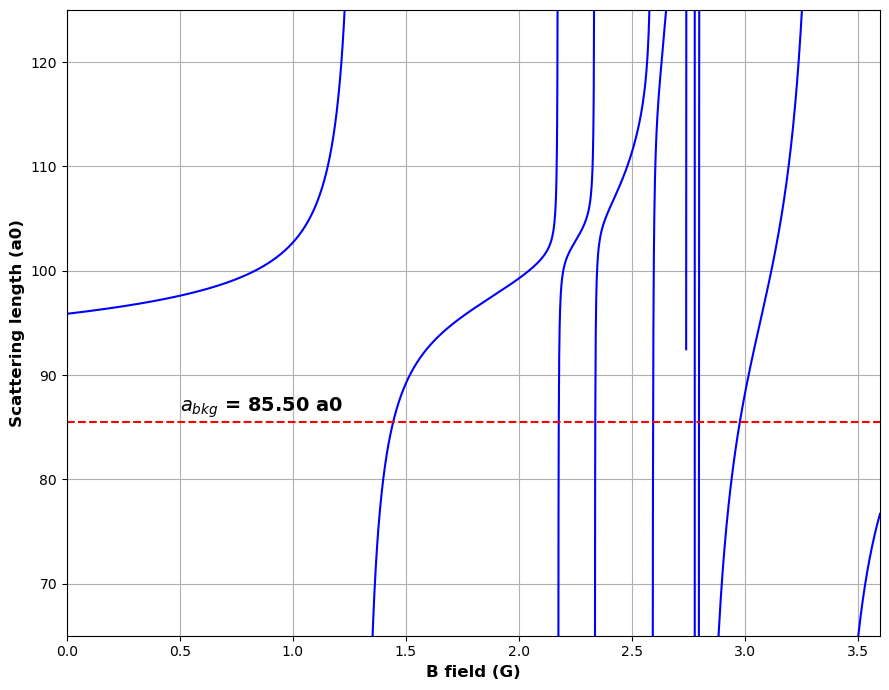

In [8]:
plotScatteringLengths(B_range = [0, 3.6])

##  Calculate and Plot Collision Rates and PSD

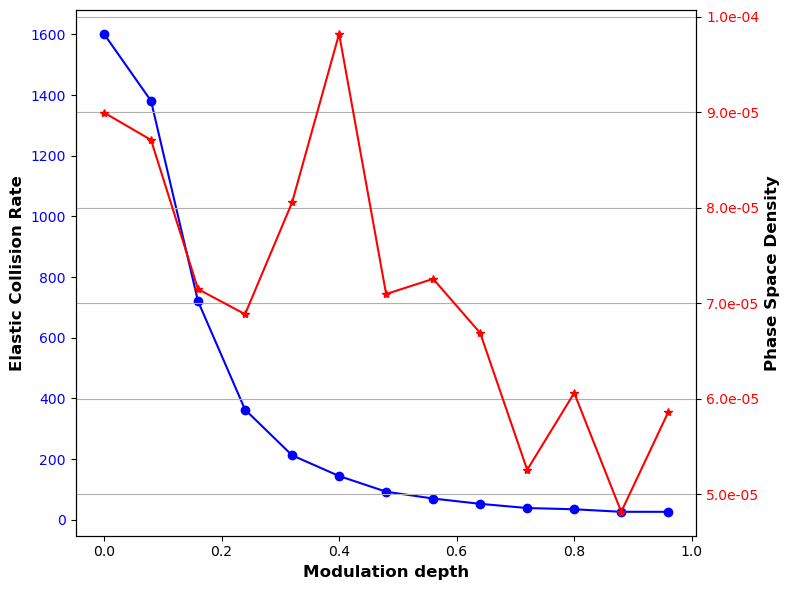

In [9]:
AtomNumber = 1.00 * 1e7
BField = 1.4 * u.G
Power = 40*u.W
Wavelength = 1.064*u.um
w_x, w_z = 30*u.um, 30*u.um # Beam Waists in the x and y directions
modulation_depth = np.arange(0, 1.0, 0.08)

w_xs = w_x * convert_modulation_depth_to_alpha(modulation_depth)[0]
new_aspect_ratio  = w_xs / w_z
Temperatures = convert_modulation_depth_to_temperature(modulation_depth)[0] * u.uK

# n = np.zeros(len(modulation_depth))
Gamma_elastic = np.zeros(len(modulation_depth))
PSD = np.zeros(len(modulation_depth))

for i in range(len(modulation_depth)):
    # n[i] = particleDensity(w_xs[i], w_z, Power, N = AtomNumber, T = Temperatures[i]).decompose().to(u.cm**(-3))
    Gamma_elastic[i] = calculateElasticCollisionRate(w_xs[i], w_z, Power, N = AtomNumber, T = Temperatures[i], B = BField).value
    PSD[i] = calculatePSD(w_xs[i], w_z, Power, N = AtomNumber, T = Temperatures[i]).decompose().value


plotCollisionRatesAndPSD(Gamma_elastic, PSD, modulation_depth, new_aspect_ratio, plot_against_mod_depth = True)

## Plot Collision Rates and PSD from only measured trap frequencies

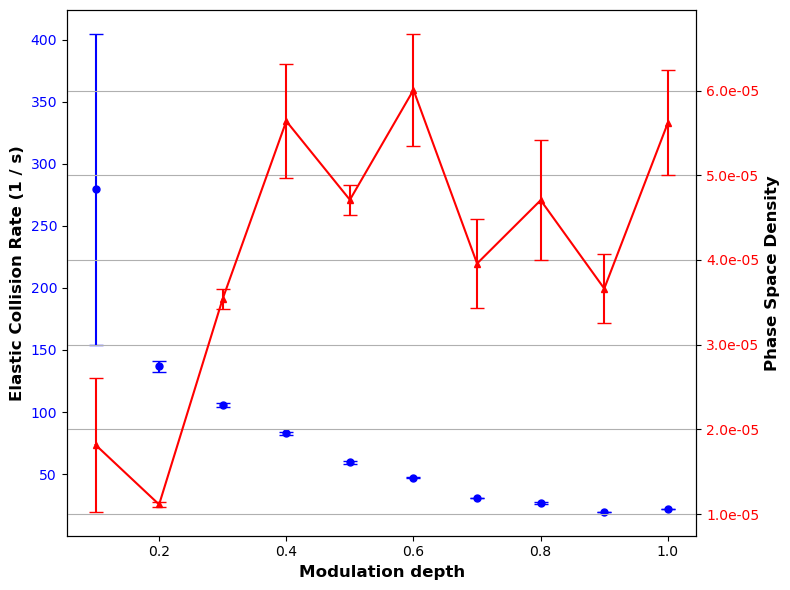

In [10]:
AtomNumber = 1.00 * 1e7
BField = 1.4 * u.G
Wavelength = 1.064*u.um
w_x, w_z = 30*u.um, 30*u.um # Beam Waists in the x and y directions

fin_mod_depth = [0.5, 0.3, 0.7, 0.9, 0.8, 1.0, 0.6, 0.4, 0.2, 0.1]
v_x = [0.28, 0.690, 0.152, 0.102, 0.127, 0.099, 0.205, 0.404, 1.441, 2.813] * u.kHz
dv_x = [0.006, 0.005, 0.006, 0.003, 0.002, 0.002,0.002, 0.003, 0.006, 0.024] * u.kHz
v_z = [1.278, 1.719, 1.058, 0.923, 0.994, 0.911, 1.157, 1.446, 2.191, 2.643] * u.kHz
dv_z = [0.007, 0.009, 0.007, 0.005, 0.004, 0.004, 0.005, 0.007, 0.009, 0.033] * u.kHz
sorted_modulation_depth, sorted_v_x = zip(*sorted(zip(fin_mod_depth, v_x)))
sorted_modulation_depth, sorted_dv_x = zip(*sorted(zip(fin_mod_depth, dv_x)))
sorted_modulation_depth, sorted_v_z = zip(*sorted(zip(fin_mod_depth, v_z)))
sorted_modulation_depth, sorted_dv_z = zip(*sorted(zip(fin_mod_depth, dv_z)))

fin_mod_depth = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1] 
v_y = [3.08, 3.13, 3.27, 3.46, 3.61, 3.82, 3.51, 3.15, 3.11, 3.02] * u.Hz
dv_y = [0.03, 0.04, 0.04, 0.05, 0.07, 0.06, 0.11, 0.07, 0.1, 1.31] * u.Hz
sorted_modulation_depth, sorted_v_y = zip(*sorted(zip(fin_mod_depth, v_y)))
sorted_modulation_depth, sorted_dv_y = zip(*sorted(zip(fin_mod_depth, dv_y)))

fin_mod_depth = [1.0, 0.8, 0.6, 0.4, 0.2, 0.9, 0.7, 0.5, 0.3, 0.1]
T_x = [22.1, 27.9, 31.7, 42.2, 145.8, 27.9, 33.8, 42.4, 61.9, 136.1] * u.uK
dT_x = [1.7, 2.6, 2.4, 3.7, 1.1, 2.2, 3.2, 1.7, 2.2, 1.2] * u.uK
T_y = [13.13, 14.75, 18.44, 26.31, 52.55, 13.54, 16.11, 21.15, 35.81, 85.8] * u.uK
dT_y = [0.05, 0.05, 0.07, 0.16, 0.28, 0.04, 0.07, 0.10, 0.21, 0.8] * u.uK

sorted_modulation_depth, sorted_T_x = zip(*sorted(zip(fin_mod_depth, T_x)))
sorted_modulation_depth, sorted_dT_x = zip(*sorted(zip(fin_mod_depth, dT_x)))
sorted_modulation_depth, sorted_T_y = zip(*sorted(zip(fin_mod_depth, T_y)))
sorted_modulation_depth, sorted_dT_y = zip(*sorted(zip(fin_mod_depth, dT_y)))

modulation_depth = sorted_modulation_depth

pd, dpd, T, dT, new_aspect_ratio = calculateParticleDensityFromMeasurements(sorted_v_x, sorted_dv_x, sorted_v_y, sorted_dv_y, sorted_v_z, sorted_dv_z, w_x, w_z, sorted_T_x, sorted_T_y, sorted_dT_x, sorted_dT_y, sorted_modulation_depth, AtomNumber, m = 164*u.u)

Gamma_elastic = [(pd[i] * scatteringCrossSection(BField) * meanThermalVelocity(T[i]) / (2 * np.sqrt(2))).decompose()  for i in range(len(pd))]
Gamma_elastic_values = [(Gamma_elastic[i]).value  for i in range(len(Gamma_elastic))]
dGamma_elastic = [(Gamma_elastic[i] * ((dpd[i]/pd[i]) + (dT[i]/(2*T[i])))).decompose() for i in range(len(Gamma_elastic))]
dGamma_elastic_values = [(dGamma_elastic[i]).value for i in range(len(dGamma_elastic))]

PSD = [((pd[i] * thermaldeBroglieWavelength(T[i])**3).decompose()).value for i in range(len(pd))]
dPSD = [((PSD[i] * ((dpd[i]/pd[i]) - (1.5 * dT[i]/T[i]))).decompose()).value for i in range(len(Gamma_elastic))]

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
ax1.errorbar(modulation_depth, Gamma_elastic_values, yerr = dGamma_elastic_values, fmt = 'ob', markersize=5, capsize=5)
ax2.errorbar(modulation_depth, PSD, yerr = dPSD, fmt = '-^r', markersize=5, capsize=5)
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax1.set_xlabel('Modulation depth', fontsize= 12, fontweight='bold')
ax1.set_ylabel('Elastic Collision Rate (' + str(Gamma_elastic[0].unit) + ')', fontsize= 12, fontweight='bold')
ax1.tick_params(axis="y", labelcolor='b')
ax2.set_ylabel('Phase Space Density', fontsize= 12, fontweight='bold')
ax2.tick_params(axis="y", labelcolor='r')
plt.tight_layout()
plt.grid(visible=1)
plt.show()

## Investigate deviation in alpha

C:\Users\Karthik\anaconda3\envs\Py39VEnv\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


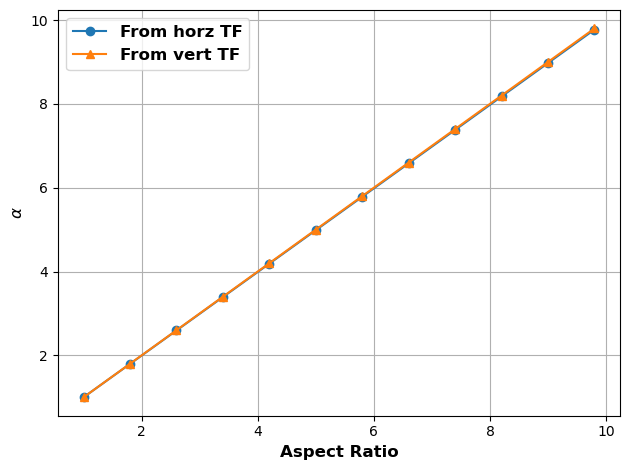

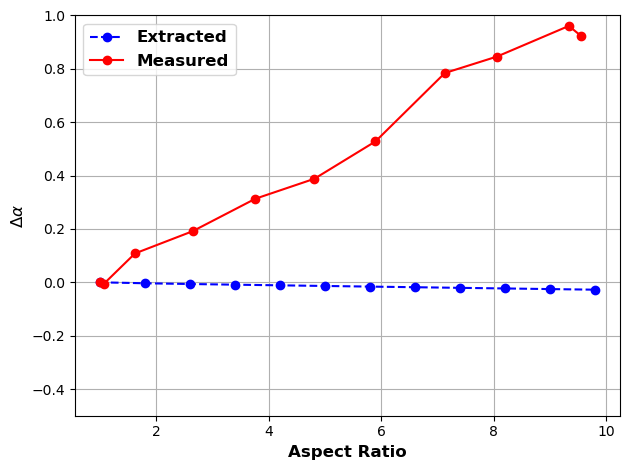

In [11]:
Power = 40*u.W
Wavelength = 1.064*u.um
w_x, w_z = 30*u.um, 30*u.um

options = {
    'axis': 0, # axis referenced to the beam along which you want the dipole trap potential
    'extent': 3e2, # range of spatial coordinates in one direction to calculate trap potential over
    'crossed': False,
    'delta': 70, # angle between arms in degrees
    'modulation': False,
    'aspect_ratio': 5, # required aspect ratio of modulated arm
    'gravity': True,
    'tilt_gravity': False,
    'theta': 0.75, # gravity tilt angle in degrees
    'tilt_axis': [1, 0, 0], # lab space coordinates are rotated about x-axis in reference frame of beam
    'astigmatism': True,
    'foci_disp_single': 2.5*u.mm, #0.9 * z_R(w_0 = np.asarray([30]), lamb = 1.064)[0]*u.um, # difference in position of the foci along the propagation direction
    'foci_disp_crossed': [2.5*u.mm, 1.5*u.mm], # astigmatism of each of the two beams in the cODT
    'foci_shift': [0.0*u.mm, 0.0*u.mm],
    'beam_disp': [[0.0, 0.0, 0.0]*u.mm, [0, 0, 0.03]*u.mm],
    'extract_trap_frequencies': False # Flag to extract trap frequencies by fitting the computed potential
}

modulation_depth = np.arange(0, 1.1, 0.1)
Alphas, fin_mod_dep, meas_alpha_x, meas_alpha_z, dalpha_x, dalpha_z = convert_modulation_depth_to_alpha(modulation_depth) 
meas_alpha_deviation = [(g - h) for g, h in zip(meas_alpha_x, meas_alpha_z)]
sorted_fin_mod_dep, sorted_meas_alpha_deviation = zip(*sorted(zip(fin_mod_dep, meas_alpha_deviation)))
avg_alpha = [(g + h) / 2 for g, h in zip(meas_alpha_x, meas_alpha_z)]
sorted_fin_mod_dep, new_aspect_ratio = zip(*sorted(zip(fin_mod_dep, (w_x * avg_alpha) / w_z)))

current_ar = w_x/w_z
aspect_ratio = np.arange(current_ar, 10*current_ar, 0.8)
w_x = w_x * (aspect_ratio / current_ar)

v_x = np.zeros(len(w_x))
#v_y = np.zeros(len(w_x))
v_z = np.zeros(len(w_x))

for i in range(len(w_x)):
    
    options['axis'] = 0
    ExtractedTrapFrequencies = computeTrapPotential(w_x[i], w_z, Power, options)[5]
    tmp = ExtractedTrapFrequencies[0][0]
    v_x[i] = tmp if not np.isinf(tmp) else np.nan
    
    # options['axis'] = 1
    # ExtractedTrapFrequencies = computeTrapPotential(w_x[i], w_z, Power, options)[5]
    # tmp = ExtractedTrapFrequencies[1][0]
    # v_y[i] = tmp if not np.isinf(tmp) else np.nan
    
    options['axis'] = 2
    ExtractedTrapFrequencies = computeTrapPotential(w_x[i], w_z, Power, options)[5]
    tmp = ExtractedTrapFrequencies[0][0]
    v_z[i] = tmp if not np.isinf(tmp) else np.nan

    #v_x[i] = calculateTrapFrequency(w_x[i], w_z, Power, dir = 'x').value
    #v_y[i] = calculateTrapFrequency(w_x[i], w_z, Power, dir = 'y').value
    #v_z[i] = calculateTrapFrequency(w_x[i], w_z, Power, dir = 'z').value

alpha_x = [(v_x[0]/v)**(2/3) for v in v_x]
alpha_z = [(v_z[0]/v)**2 for v in v_z]

calc_alpha_deviation = [(g - h) for g, h in zip(alpha_x, alpha_z)]

plt.figure()
plt.plot(aspect_ratio, alpha_x, '-o', label = 'From horz TF')
plt.plot(aspect_ratio, alpha_z, '-^', label = 'From vert TF')
plt.xlabel('Aspect Ratio', fontsize= 12, fontweight='bold')
plt.ylabel('$\\alpha$', fontsize= 12, fontweight='bold')
plt.tight_layout()
plt.grid(visible=1)
plt.legend(prop={'size': 12, 'weight': 'bold'})
plt.show()

plt.figure()
plt.plot(aspect_ratio, calc_alpha_deviation, '--ob', label = 'Extracted')
plt.plot(new_aspect_ratio, sorted_meas_alpha_deviation, '-or', label = 'Measured')
plt.xlabel('Aspect Ratio', fontsize= 12, fontweight='bold')
plt.ylabel('$\\Delta \\alpha$', fontsize= 12, fontweight='bold')
plt.ylim([-0.5, 1])
plt.tight_layout()
plt.grid(visible=1)
plt.legend(prop={'size': 12, 'weight': 'bold'})
plt.show()

## Quick calculation of PSD and elastic collision rate

In [12]:
Power = 9.5*u.W
Wavelength = 1.064*u.um
w_x, w_z = 50*u.um, 45*u.um # Beam Waists in the x and y directions

NCount = 11000
AtomNumber = calculateAtomNumber(NCount, pixel_size = 3.45 * u.um, magnification = 0.5, eta = 0.5)
#AtomNumber = calculateAtomNumber(NCount, pixel_size = 5.86 * u.um, magnification = 0.5, eta = 0.5)

BField = 3.75 * u.G
modulation_depth = 0.00

w_x = w_x * convert_modulation_depth_to_alpha(modulation_depth)[0]
new_aspect_ratio  = w_x / w_z
Temperature = 33 * u.uK

n = particleDensity(w_x, w_z, Power, N = AtomNumber, T = Temperature).decompose().to(u.cm**(-3))
Gamma_elastic = calculateElasticCollisionRate(w_x, w_z, Power, N = AtomNumber, T = Temperature, B = BField)
PSD = calculatePSD(w_x, w_z, Power, N = AtomNumber, T = Temperature).decompose()

print('Particle Density = %.2E ' % (n.value) + str(n.unit))
print('Elastic Collision Rate = %.2f ' % (Gamma_elastic.value) + str(Gamma_elastic.unit))
print('PSD = %.2E ' % (PSD.value))

Particle Density = 1.87E+12 1 / cm3
Elastic Collision Rate = 37.24 1 / s
PSD = 2.50E-05 


## Plot measured PSDs and collision rates

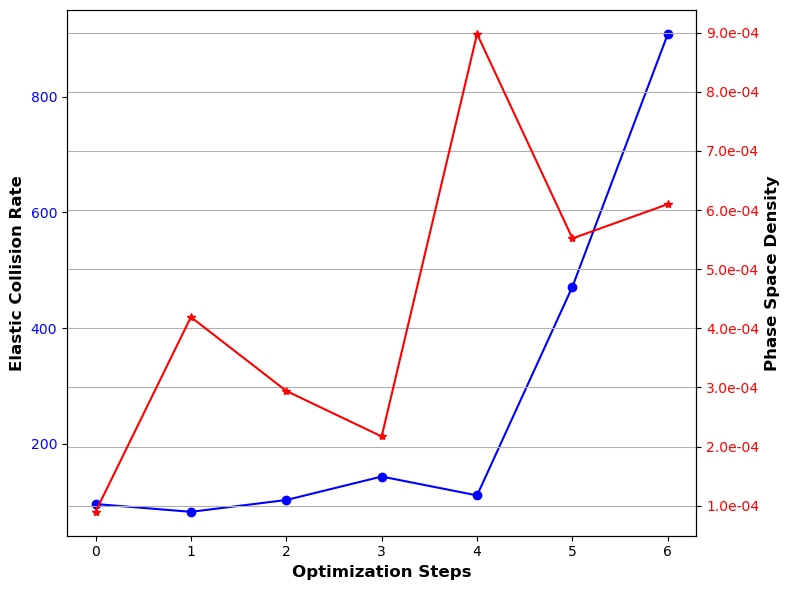

In [13]:
Gamma_elastic = [96.01, 82.53, 102.95, 143.5, 110.92, 471.77, 908.46]
PSD = [8.95e-05, 4.19e-04, 2.94e-04, 2.17e-04, 8.98e-04, 5.52e-04, 6.10e-04]

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.plot(Gamma_elastic, '-ob')
ax2.plot(PSD, '-*r')
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

ax1.set_xlabel('Optimization Steps', fontsize= 12, fontweight='bold')
ax1.set_ylabel('Elastic Collision Rate', fontsize= 12, fontweight='bold')
ax1.tick_params(axis="y", labelcolor='b')
ax2.set_ylabel('Phase Space Density', fontsize= 12, fontweight='bold')
ax2.tick_params(axis="y", labelcolor='r')
plt.tight_layout()
plt.grid(visible=1)
plt.show()

## Plot crossed beam trap potential resulting for given parameters only

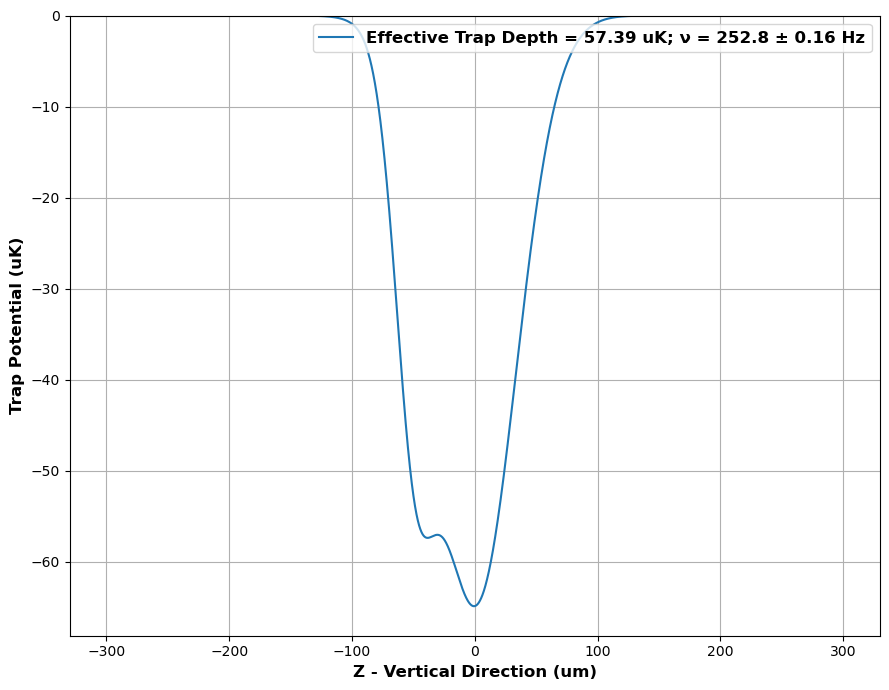

In [14]:
Powers = [1, 11] * u.W
Wavelength = 1.064*u.um
w_x = [27, 67]*u.um # Beam Waists in the x direction
w_z = [31, 67]*u.um # Beam Waists in the y direction

options = {
    'axis':2, # axis referenced to the beam along which you want the dipole trap potential
    'extent': 3e2, # range of spatial coordinates in one direction to calculate trap potential over
    'crossed': True, # Flag for either a crossed beam configuration or a single focussed beam
    'delta': 70, # angle between arms in degrees
    'modulation': False, # Flag for spatial modulation of a single beam
    'aspect_ratio': 5, # required aspect ratio of modulated arm
    'gravity': False, # Flag for adding levitation/gravitation potential
    'tilt_gravity': False, # Flag for tilt of the beam wrt to gravity axis
    'theta': 0.75, # gravity tilt angle in degrees
    'tilt_axis': [1, 0, 0], # lab space coordinates are rotated about x-axis in reference frame of beam
    'astigmatism': False, # Flag for astigmatism of beam
    'foci_disp_single': 2.5*u.mm, #0.9 * z_R(w_0 = np.asarray([30]), lamb = 1.064)[0]*u.um, # difference in position of the foci along the propagation direction
    'foci_disp_crossed': [2.5*u.mm, 2.8*u.mm], # astigmatism of each of the two beams in the cODT
    'foci_shift': [0.0*u.mm, 0.0*u.mm],
    'beam_disp': [[0.0, 0.0, 0.05]*u.mm, [0.0, 0.0, 0.0]*u.mm], # shift arm 1 along x, z; shift arm 2 along y, z
    'extract_trap_frequencies': True # Flag to extract trap frequencies by fitting the computed potential
}

Positions, IdealTrappingPotential, TrappingPotential, TrapDepthsInKelvin, CalculatedTrapFrequencies, ExtractedTrapFrequencies = computeTrapPotential(w_x, w_z, Powers, options)

EffectiveTrapDepthInKelvin = TrapDepthsInKelvin[1]
v  = ExtractedTrapFrequencies[1][0]
dv = ExtractedTrapFrequencies[1][1]

plt.figure(figsize=(9, 7))
plt.plot(Positions[options['axis']], TrappingPotential[options['axis']], label = 'Effective Trap Depth = ' + str(round(EffectiveTrapDepthInKelvin.value, 2)) + ' ' + str(EffectiveTrapDepthInKelvin.unit) + '; ' + generate_label(v, dv)) 
#plt.plot(Positions[options['axis']], TrappingPotential[options['axis']]) 
axis = options['axis']
if axis == 0:
    dir = 'X - Horizontal'
elif axis == 1:
    dir = 'Y - Propagation'
else:
    dir = 'Z - Vertical'
    
plt.ylim(top = 0)
plt.xlabel(dir + ' Direction (um)', fontsize= 12, fontweight='bold')
plt.ylabel('Trap Potential (uK)', fontsize= 12, fontweight='bold')
plt.tight_layout()
plt.grid(visible=1)
plt.legend(loc=1, prop={'size': 12, 'weight': 'bold'})

## Calculate trap frequencies in a crossed beam trap for given parameters

In [15]:
Powers = [1, 11] * u.W
w_x = [27, 67]*u.um # Beam Waists in the x direction
w_z = [31, 67]*u.um # Beam Waists in the y direction

options = {
    'axis': 1, # axis referenced to the beam along which you want the dipole trap potential
    'extent': 1e3, # range of spatial coordinates in one direction to calculate trap potential over
    'crossed': True, # Flag for either a crossed beam configuration or a single focussed beam
    'delta': 70, # angle between arms in degrees
    'modulation': False, # Flag for spatial modulation of a single beam
    'aspect_ratio': 5, # required aspect ratio of modulated arm
    'gravity': False, # Flag for adding levitation/gravitation potential
    'tilt_gravity': False, # Flag for tilt of the beam wrt to gravity axis
    'theta': 0.75, # gravity tilt angle in degrees
    'tilt_axis': [1, 0, 0], # lab space coordinates are rotated about x-axis in reference frame of beam
    'astigmatism': False, # Flag for astigmatism of beam
    'foci_disp_single': 2.5*u.mm, #0.9 * z_R(w_0 = np.asarray([30]), lamb = 1.064)[0]*u.um, # difference in position of the foci along the propagation direction
    'foci_disp_crossed': [2.5*u.mm, 1.5*u.mm], # astigmatism of each of the two beams in the cODT
    'foci_shift': [0.01*u.mm, 0.20*u.mm],
    'beam_disp': [[0, 0, 0.0]*u.mm, [0, 0, 0.0]*u.mm],
    'extract_trap_frequencies': False # Flag to extract trap frequencies by fitting the computed potential
}

v_x = calculateCrossedBeamTrapFrequency(options['delta'], [w_x, w_z], Powers, dir = 'x')
v_y = calculateCrossedBeamTrapFrequency(options['delta'], [w_x, w_z], Powers, dir = 'y')
v_z = calculateCrossedBeamTrapFrequency(options['delta'], [w_x, w_z], Powers, dir = 'z')

print('v_x = %.2f ' %(v_x.value) + str(v_x.unit))
print('v_y = %.2f ' %(v_y.value) + str(v_y.unit))
print('v_z = %.2f ' %(v_z.value) + str(v_z.unit))

v_x = 480.60 Hz
v_y = 255.73 Hz
v_z = 492.63 Hz


## Calculate trap frequencies, trap depths in a crossed beam trap for different shifts of Arm 2 along Y and Z

In [ ]:
Powers = [1, 11] * u.W
Wavelength = 1.064*u.um
w_x = [27, 67]*u.um # Beam Waists in the x direction
w_z = [31, 67]*u.um # Beam Waists in the y direction

options = {
    'axis':1, # axis referenced to the beam along which you want the dipole trap potential
    'extent': 2e3, # range of spatial coordinates in one direction to calculate trap potential over
    'crossed': True, # Flag for either a crossed beam configuration or a single focussed beam
    'delta': 70, # angle between arms in degrees
    'modulation': False, # Flag for spatial modulation of a single beam
    'aspect_ratio': 5, # required aspect ratio of modulated arm
    'gravity': False, # Flag for adding levitation/gravitation potential
    'tilt_gravity': False, # Flag for tilt of the beam wrt to gravity axis
    'theta': 0.75, # gravity tilt angle in degrees
    'tilt_axis': [1, 0, 0], # lab space coordinates are rotated about x-axis in reference frame of beam
    'astigmatism': False, # Flag for astigmatism of beam
    'foci_disp_single': 2.5*u.mm, #0.9 * z_R(w_0 = np.asarray([30]), lamb = 1.064)[0]*u.um, # difference in position of the foci along the propagation direction
    'foci_disp_crossed': [2.5*u.mm, 2.8*u.mm], # astigmatism of each of the two beams in the cODT
    'foci_shift': [0.0*u.mm, 0.0*u.mm],
    'beam_disp': [[0.0, 0.0, 0.0]*u.mm, [0.0, 0.0, 0.0]*u.mm],
    'extract_trap_frequencies': True # Flag to extract trap frequencies by fitting the computed potential
}

disp_range = 100
yvals = np.arange(-disp_range, disp_range, 5) 
zvals = np.arange(-disp_range, disp_range, 5)

TrapDepths = np.zeros((len(yvals), len(zvals))) * u.uK
TrapFrequencies = np.zeros((len(yvals), len(zvals)))

idx = 0
if options['extract_trap_frequencies']:
    idx = 1
            
for i in range(len(yvals)):
    options['beam_disp'][1][1] = yvals[i] * u.um
    for j in range(len(zvals)):
        options['beam_disp'][1][2] = zvals[j] * u.um
        Positions, IdealTrappingPotential, TrappingPotential, TrapDepthsInKelvin, CalculatedTrapFrequencies, ExtractedTrapFrequencies = computeTrapPotential(w_x, w_z, Powers, options)
        TrapDepths[i][j]      = TrapDepthsInKelvin[1]        
        try:
            if np.isnan(ExtractedTrapFrequencies[idx][0].value):
                TrapFrequencies[i][j] = np.nan
            else:
                TrapFrequencies[i][j] = ExtractedTrapFrequencies[idx][0]    
        except:
            TrapFrequencies[i][j] = ExtractedTrapFrequencies[idx][0]                

In [ ]:
fig, ax = plt.subplots()
axis = options['axis']
if axis == 0:
    dir = 'X'
elif axis == 1:
    dir = 'Y'
else:
    dir = 'Z'
plt.title('Trap Frequency along ' + dir)
c = ax.matshow(np.asarray(TrapFrequencies), origin='lower', cmap = 'coolwarm', aspect = 1)
x_pos = np.arange(len(zvals))
plt.xticks(x_pos, zvals)
#plt.xticks(np.arange(min(zvals.value), max(zvals.value), 30))
ax.xaxis.set_ticks_position('bottom')
y_pos = np.arange(len(yvals))
plt.yticks(y_pos, yvals)
#plt.yticks(np.arange(min(yvals.value), max(yvals.value), 30))
plt.xlabel('Z - shift (um)', fontsize= 12, fontweight='bold')
plt.ylabel('Y - shift (um)', fontsize= 12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.colorbar(c, ax = ax)
plt.tight_layout()
plt.grid(visible=1)
plt.show()

## Calculate trap frequencies, trap depths in a crossed beam trap for different shifts of Arm 1 along X and Z

In [ ]:
Powers = [1, 11] * u.W
Wavelength = 1.064*u.um
w_x = [27, 67]*u.um # Beam Waists in the x direction
w_z = [31, 67]*u.um # Beam Waists in the y direction

options = {
    'axis':2, # axis referenced to the beam along which you want the dipole trap potential
    'extent': 3e3, # range of spatial coordinates in one direction to calculate trap potential over
    'crossed': True, # Flag for either a crossed beam configuration or a single focussed beam
    'delta': 70, # angle between arms in degrees
    'modulation': False, # Flag for spatial modulation of a single beam
    'aspect_ratio': 5, # required aspect ratio of modulated arm
    'gravity': False, # Flag for adding levitation/gravitation potential
    'tilt_gravity': False, # Flag for tilt of the beam wrt to gravity axis
    'theta': 0.75, # gravity tilt angle in degrees
    'tilt_axis': [1, 0, 0], # lab space coordinates are rotated about x-axis in reference frame of beam
    'astigmatism': False, # Flag for astigmatism of beam
    'foci_disp_single': 2.5*u.mm, #0.9 * z_R(w_0 = np.asarray([30]), lamb = 1.064)[0]*u.um, # difference in position of the foci along the propagation direction
    'foci_disp_crossed': [2.5*u.mm, 2.8*u.mm], # astigmatism of each of the two beams in the cODT
    'foci_shift': [0.0*u.mm, 0.0*u.mm],
    'beam_disp': [[0.0, 0.0, 0.0]*u.mm, [0.0, 0.0, 0.0]*u.mm],
    'extract_trap_frequencies': True # Flag to extract trap frequencies by fitting the computed potential
}

disp_range = 100
xvals = np.arange(-disp_range, disp_range, 5) 
zvals = np.arange(-disp_range, disp_range, 5)

TrapDepths = np.zeros((len(xvals), len(zvals))) * u.uK
TrapFrequencies = np.zeros((len(xvals), len(zvals)))

idx = 0
if options['extract_trap_frequencies']:
    idx = 1
            
for i in range(len(xvals)):
    options['beam_disp'][0][0] = xvals[i] * u.um
    for j in range(len(zvals)):
        options['beam_disp'][0][2] = zvals[j] * u.um
        Positions, IdealTrappingPotential, TrappingPotential, TrapDepthsInKelvin, CalculatedTrapFrequencies, ExtractedTrapFrequencies = computeTrapPotential(w_x, w_z, Powers, options)
        TrapDepths[i][j]      = TrapDepthsInKelvin[1]        
        try:
            if np.isnan(ExtractedTrapFrequencies[idx][0].value):
                TrapFrequencies[i][j] = np.nan
            else:
                TrapFrequencies[i][j] = ExtractedTrapFrequencies[idx][0]    
        except:
            TrapFrequencies[i][j] = ExtractedTrapFrequencies[idx][0]                

In [ ]:
fig, ax = plt.subplots()
axis = options['axis']
if axis == 0:
    dir = 'X'
elif axis == 1:
    dir = 'Y'
else:
    dir = 'Z'
plt.title('Trap Frequency along ' + dir)

c = ax.matshow(np.asarray(TrapFrequencies), origin='lower', cmap = 'coolwarm', aspect = 1)

x_pos = np.arange(len(zvals))
plt.xticks(x_pos, zvals)
#plt.xticks(np.arange(min(zvals.value), max(zvals.value), 30))
ax.xaxis.set_ticks_position('bottom')
x_pos = np.arange(len(xvals))
plt.yticks(x_pos, xvals)
#plt.yticks(np.arange(min(yvals.value), max(yvals.value), 30))
plt.xlabel('Z - shift (um)', fontsize= 12, fontweight='bold')
plt.ylabel('X - shift (um)', fontsize= 12, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.colorbar(c, ax = ax)
plt.tight_layout()
plt.grid(visible=1)
plt.show()

# Heating Rate in ODT Arm 1

In [ ]:
w_x = 27 * u.um
w_y = 31 * u.um
P = 2.29 * u.W
linewidth  = 32.2 * u.MHz
detuning   = 4.3e+14 * u.Hz 

HeatingRate, T_recoil, Gamma_sr, U = calculateHeatingRate(w_x, w_y, P, linewidth, detuning, wavelength = 1.064*u.um)

print((U/ac.k_B).to(u.uK))
print(Gamma_sr)
print(HeatingRate.to(u.nK/u.s))